In [1]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def print_image(plot, data, shape=(64, 64)):
    plot.imshow(np.flip(data.reshape(shape).T, 1), cmap=plt.get_cmap('gray'))
    plot.axis('off')

## Part 1. Implement PCA and Dual PCA algorithms

### <span style="color:red">=========== Assignment 1 ===========</span>

In [3]:
# PCA (with covariance)

# test the function.

def my_pca(X, p=None):
    # Step1: Data centralisation
    # 1.1 get the "mean matrix"
    m = np.mean(X, axis=1)
    m = m.reshape(m.shape[0], 1)
    
    # 1.2 Data centralisation
    X_hat = X - m
    
    # Step2: Eigen analysis
    # 2.1 Calculate the covariance matrix
    cov_mat = np.mat(np.cov(X_hat, rowvar=True))
    print("shape is")
    print(cov_mat.shape)
    
    # 2.2 Find out all eigenvalues
    eig_val, eig_vec = np.linalg.eig(cov_mat)
    print(eig_val, eig_vec)
    
    # 2.3 Sort all eigenvalues
    # Get the index of the feature vectors sorted from largest to smallest
    sorted_idx = np.argsort(-eig_val)
    print(sorted_idx)
    sorted_eig_val = eig_val[sorted_idx]
    # data are organised in the column vector notation
    sorted_eig_vec = eig_vec[:, sorted_idx]
    print(sorted_eig_vec)
    
    # Step3: Construct projection matrix 
    # 3.1 find out a proper dimension(PoV)
    if p is None:
        p = 0 # p stands for the dimension
        tot_p_eig_val = 0 # represents the sum of the first p eigenvalues
        tot_eig_val = sum(eig_val)

        for val in sorted_eig_val:
            tot_p_eig_val += val
            p += 1
            if (tot_p_eig_val / tot_eig_val) >= 0.9:
                break

        print(tot_p_eig_val)
        print(tot_p_eig_val / tot_eig_val)
    
    # 3.2 Select top p (p < d) eigenvectors of S to be principal components to form the projection matrix
    P = sorted_eig_vec[:,:p]
    print(P)
    P_mat = np.mat(P)
    print(P_mat.T)
    
    # Step 4: Encoding: generate a low-dimensional representation of data point
    z = np.dot(P_mat.T, X_hat)

    # Step 5: Decoding: reconstruct data point from its low-dimensional representation
    X_de = m + np.dot(P,z)
    return z, X_de, sorted_eig_val, sorted_eig_vec

def my_PoV(eig_val):
    p = 0 # p stands for the dimension
    tot_p_eig_val = 0 # represents the sum of the first p eigenvalues
    tot_eig_val = sum(eig_val)

    for val in eig_val:
        tot_p_eig_val += val
        p += 1
        if (tot_p_eig_val / tot_eig_val) >= 0.9:
            return p
    return p


### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

In [4]:
# PCA (with SVD)

def my_dual_pca(X, p=None):
    # Step1: Data centralisation
    # 1.1 get the "mean matrix"
    m = np.mean(X, axis=1)
    m = m.reshape(m.shape[0], 1)
    
    # 1.2 Data centralisation
    X_hat = X - m
    print("X_hat is ")
    print(X_hat)
    
    # Step2: SVD solution to eigen analysis
    # 2.1 calculate Y
    N = X.shape[1]
    Y = X_hat.T / np.sqrt(N-1) 
    print("Y is")
    print(Y)
    
    # 2.2 SVD
    # columns stand for instance
    U,sigma,VT = np.linalg.svd(Y)
    V = VT.T
    print("sigma=")
    print(sigma)
    
    # Step3: Construct projection matrix 
    # 3.1 find out a proper dimension(PoV)
    if p is None:
        p = 0 # p stands for the dimension
        tot_p_sigma = 0 # represents the sum of the first p eigenvalues
        tot_sigma = sum(sigma)

        for val in sigma:
            tot_p_sigma += val
            p += 1
            if (tot_p_sigma / tot_sigma) >= 0.9:
                break

        print(tot_p_sigma)
        print(tot_p_sigma / tot_sigma)
    
    # 3.2 Select top p (p < d) eigenvectors of S to be principal components to form the projection matrix
    P = V[:p]
    print(P)
    P_mat = np.mat(P)
    
    
    # Step3:  Encoding:
    z = np.dot(P_mat, X_hat)
#     b = np.dot(np.diag(sigma), VT[:, :p])
#     z = np.dot(U[:p], b)
    
    # Step4: Decoding
    X_de = m + np.dot(P_mat.T,z)
    return z, X_de, sigma, VT, p

### <span style="color:red">=========== End of Assignment 2 ===========</span>

## Part 2. Visualisation

### <span style="color:red">=========== Assignment 3 ===========</span>

In [5]:
# Import dataset
iris = datasets.load_iris()
X = iris.data.T
print(iris.data.shape)
y = iris.target

(150, 4)


In [6]:
# Visualisation
from sklearn.decomposition import PCA

en_X, de_X, sorted_eig_val, sorted_vec = my_pca(X, 2)
print("en_X is :")
print(en_X)
print(en_X.shape)

en_X1 = PCA(2).fit_transform(X.T)
print("en_X1 is:")
print(en_X1)
print(en_X1.shape)

shape is
(4, 4)
[4.22824171 0.24267075 0.0782095  0.02383509] [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]
[0 1 2 3]
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]
[[ 0.36138659 -0.65658877]
 [-0.08452251 -0.73016143]
 [ 0.85667061  0.17337266]
 [ 0.3582892   0.07548102]]
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]]
en_X is :
[[-2.68412563 -2.71414169 -2.88899057 -2.74534286 -2.72871654 -2.28085963
  -2.82053775 -2.62614497 -2.88638273 -2.6727558  -2.50694709 -2.61275523
  -2.78610927 -3.22380374 -2.64475039 -2.38603903 -2.62352788 -2.64829671
  -2.19982032 -2.5879864  -2.31025622 -2.54370523 -3.21593942 -2.30273318


In [7]:
print(en_X1.T)

[[-2.68412563 -2.71414169 -2.88899057 -2.74534286 -2.72871654 -2.28085963
  -2.82053775 -2.62614497 -2.88638273 -2.6727558  -2.50694709 -2.61275523
  -2.78610927 -3.22380374 -2.64475039 -2.38603903 -2.62352788 -2.64829671
  -2.19982032 -2.5879864  -2.31025622 -2.54370523 -3.21593942 -2.30273318
  -2.35575405 -2.50666891 -2.46882007 -2.56231991 -2.63953472 -2.63198939
  -2.58739848 -2.4099325  -2.64886233 -2.59873675 -2.63692688 -2.86624165
  -2.62523805 -2.80068412 -2.98050204 -2.59000631 -2.77010243 -2.84936871
  -2.99740655 -2.40561449 -2.20948924 -2.71445143 -2.53814826 -2.83946217
  -2.54308575 -2.70335978  1.28482569  0.93248853  1.46430232  0.18331772
   1.08810326  0.64166908  1.09506066 -0.74912267  1.04413183 -0.0087454
  -0.50784088  0.51169856  0.26497651  0.98493451 -0.17392537  0.92786078
   0.66028376  0.23610499  0.94473373  0.04522698  1.11628318  0.35788842
   1.29818388  0.92172892  0.71485333  0.90017437  1.33202444  1.55780216
   0.81329065 -0.30558378 -0.06812649 -

PC1, PC2, PC3 is the first 3 vector in eigenvectors.

In [8]:
print(sorted_vec)
PC1 = sorted_vec[:, 0]
PC2 = sorted_vec[:, 1]
PC3 = sorted_vec[:, 2]

print(PC1, PC2, PC3)

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]
[[ 0.36138659]
 [-0.08452251]
 [ 0.85667061]
 [ 0.3582892 ]] [[-0.65658877]
 [-0.73016143]
 [ 0.17337266]
 [ 0.07548102]] [[-0.58202985]
 [ 0.59791083]
 [ 0.07623608]
 [ 0.54583143]]


### Visualisation

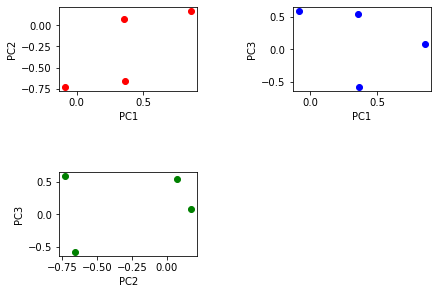

In [9]:
fig = plt.figure()  
ax1 = fig.add_subplot(2,2,1)  
plt.xlabel('PC1')
plt.ylabel('PC2')
ax1.scatter(np.array(PC1), np.array(PC2), c = 'r',marker = 'o')  
ax2 = fig.add_subplot(2,2,2)  
plt.xlabel('PC1')
plt.ylabel('PC3')
ax2.scatter(np.array(PC1), np.array(PC3), c = 'b',marker = 'o') 
ax3 = fig.add_subplot(2,2,3)  
plt.xlabel('PC2')
plt.ylabel('PC3')
ax3.scatter(np.array(PC2), np.array(PC3), c = 'g',marker = 'o') 

plt.tight_layout(pad=0.4,h_pad=5.0,w_pad=5.0) 

### describe

### <span style="color:red">=========== End of Assignment 3 ===========</span>

## Part 3. Image compression

### <span style="color:red">=========== Assignment 4 ===========</span>

In [10]:
X, _ = np.load('./Data/Yale_64x64.npy', allow_pickle=True)

_, num_examples = X.shape
test_sample = 0

test_indices =  np.arange(test_sample, num_examples, 11)
train_indices = np.delete(np.arange(num_examples), test_indices) 

train_X = X[:, train_indices]
test_X = X[:, test_indices]

For this assignment, I use PoV method to get the right dimension.

I use the PoV method to get the right dimension. I integrated this method into the my_dual_pca function. If the dimension p is given, the known p is used. If the known p is not given, the PoV method is used to find the value of p.

In [11]:
# Image compression
en_train_X, de_train_X, sigma, VT, p = my_dual_pca(train_X) 

print(p)

X_hat is 
[[ 31.42666667  12.42666667  29.42666667 ... -31.57333333 -19.57333333
  -22.57333333]
 [ 36.5          5.5         26.5        ... -31.5        -21.5
  -23.5       ]
 [ 28.94         7.94        26.94       ... -32.06       -24.06
  -24.06      ]
 ...
 [ 68.92666667  68.92666667  68.92666667 ...  57.92666667  11.92666667
  -45.07333333]
 [ 72.20666667  69.20666667  72.20666667 ...  55.20666667  49.20666667
  -72.79333333]
 [ 69.8         54.8         80.8        ...  79.8         24.8
  -92.2       ]]
Y is
[[ 2.57457285  2.99019651  2.37085718 ...  5.64669255  5.91540062
   5.71823881]
 [ 1.0180322   0.45057756  0.65047014 ...  5.64669255  5.66963104
   4.48939092]
 [ 2.41072646  2.17096459  2.20701079 ...  5.64669255  5.91540062
   6.61939392]
 ...
 [-2.58658825 -2.58058055 -2.62645754 ...  4.74553744  4.52270636
   6.53747073]
 [-1.60350995 -1.76134863 -1.971072   ...  0.9770706   4.0311672
   2.03169516]
 [-1.84927952 -1.92519501 -1.971072   ... -3.69255134 -5.96346223
  

In [12]:
en_sk_PCA = PCA(n_components=0.9).fit_transform(train_X.T)

In [13]:
print(en_sk_PCA.T)
print(en_sk_PCA.T.shape)

[[-2731.03573612 -3300.52599571 -2592.9091608  ...  2713.12949323
   -248.83766203  -540.35233936]
 [-1580.80194977 -1466.81034    -1656.96515349 ... -2187.45353009
   -436.21910353  -450.04599517]
 [ -623.80094873  -998.5782377   -817.1339276  ...   794.86160086
  -1217.26888984  -323.74634841]
 ...
 [  197.56150156  -239.53750485  -263.93785648 ...  -110.35810734
    227.62647569   -64.26742436]
 [ -153.75250346   130.23954848   140.40392756 ...  -154.59503681
   -120.17602796    17.73719426]
 [  -76.82715357   212.522015    -298.74784869 ...    33.31066009
   -114.71214323  -188.79220512]]
(33, 150)


In [14]:
print(en_train_X)
print(en_train_X.shape)

[[-3717.34135286 -2886.09295702 -2679.96680825 ...   797.6837655
   -570.63594392  -518.48364616]
 [  161.62173348  3023.65035435  1139.37867315 ...  -838.15774349
    -74.73239646    73.45033156]
 [  181.40763096    36.46691111 -2052.57991121 ...  -222.53244101
    132.72287678   454.17761519]
 ...
 [   -9.66454958   -92.74622427    -8.35073352 ...   147.65786252
   -109.08435318   -88.73041466]
 [  -32.62439342   -25.25158908   -53.24897835 ...   -64.3000603
   -123.69616528  -137.23646621]
 [  110.66262283   -65.77745835   101.28190424 ...   200.47928086
    138.41199495   213.12491581]]
(102, 150)


In [15]:
k = my_PoV(sigma)
print(k)

102


Therefore, k should be 102.

IndexError: index 150 is out of bounds for axis 1 with size 150

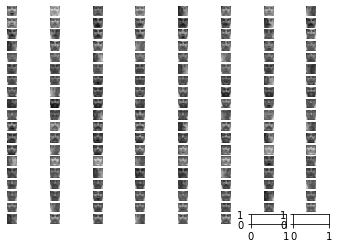

In [16]:
fig, ax = plt.subplots(int(de_train_X.shape[1]/8 + 1), 8)
for i,axi in enumerate(ax.flat):
    print_image(axi, de_train_X[:, i])
plt.show()

### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 4. Application: face recognition

### <span style="color:red">=========== Assignment 6 ===========</span>

In [ ]:
train_X, train_y, test_X, test_y = np.load('./Data/Yale_64x64-part-4-persons.npy', allow_pickle=True)

In [ ]:
# Comparison

### <span style="color:red">=========== End of Assignment 6 ===========</span>